In [21]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tejalpatel/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/tejalpatel/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [32]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/50/c2/e06851e8cc28dcad7c155f4753da8833ac06a5c704c109313b8d5a62968a/pip-23.2.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2
    Uninstalling pip-23.2:
      Successfully uninstalled pip-23.2
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install --upgrade seaborn


Note: you may need to restart the kernel to use updated packages.


In [1]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Sentiment Scoring Using SentiWordNet

In [2]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [3]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    
    return (total_score / len(raw_sentences)) * 100


In [4]:
reviews = pd.read_csv("/Users/tejalpatel/Desktop/Amazon_Reviews/small_corpus.csv")

In [5]:
reviews.shape


(4500, 12)

In [6]:
reviews.head()


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,False,"12 19, 2012",A1GBT4UN2RW7XY,B0056XXKIK,For Real,"This game truly, genuinely sucks! At first it seemed to have decent graphics and good background music, but playing the hunting game turned out to be super-frustrating. You're given four regions to hunt in but at first only Great Lakes is available, and you must finish each objective to unlock the next game. So the gameplay is very linear. But trying to shoot the animals proved almost impossible. In the very first round, I was told to kill 5 deer in 2 minutes. It took over 30 seconds for the first deer to appear, and man was he running fast. I chose the touch control where it was very difficult to aim, plus unlike any other game I've played, I had to remember to use the L button to shoot! You cannot configure the buttons! I also tried the button control scheme but it was equally frustrating.\n\nHere comes the absolutely worst part: I did manage to shoot down 5 deer and the screen showed so, yet at the end the game said I'd failed! I tried it again and the same: I was sure I'd shot down 5 deer but the game recorded none. This Italian-developed game is absolutely one of the worst games of all time.","Terrible, terrible game!",1355875200,NaN,{'Format:': ' Video Game'},NaN
1,1.0,False,"06 24, 2011",A2F4DHHHPRSAM6,B000OCXK6A,ashermanh,"This game is horrible, and I can't believe that people are actually giving it 5 stars. Do not listen to them! This is on top of my list of WORST GAMES I HAVE EVER PLAYED. Controls are horrible, gameplay is bad, the AI will only shoot on you and not focus on any of your team-mates, and on easy mode, you die within 10 seconds after going onto the battlefield. It is just a horrible game, people giving the game 5 stars were probably payed to say that stuff. Worst $10 I ever spent!",Why are people giving this 5 stars?,1308873600,2,{'Platform:': ' Xbox 360'},NaN
2,1.0,False,"10 23, 2014",A2338FMR8BL2ZD,B00KTNSLX6,Gris,"Ubisoft is the worst game development company on the planet. Perhaps they are a gaming division of Comcast, I don't know. Please do not buy any Ubisoft products, ever. JD2015 is complete trash by function and playability.",More gutter filth delivered from Ubisoft.,1414022400,7,{'Format:': ' Video Game'},NaN
3,1.0,False,"07 13, 2013",A2W7LKMON1FST0,B0095D1CM8,David Doria,"Basically if you are going to buy a gaming mouse, especially a high end one that costs over $100, you want it to last a long time and even more importantly, you want it to be reliable. This mouse has proven to be neither.\n\nThe right mouse button no longer has any resistance, and so any inadvertent touching results in the mouse thinking i pressed the button. While i can lay my finger on the left mouse button, my other finger must constantly hover just above the right mouse button. There have been so many inadvertent right clicks because of this, that i finally switched back to my standard microsoft optical mouse, because it was ruining gaming for me.\n\nOn top of that, I've experienced what a lot of others have complained about on here, the mouse's optical tracker going haywire. Generally what happens to me is the mouse won't sense ""down"" anymore, but it sense left, right and up just fine. I jiggle the mouse around and lift if off the pad a couple of times and it seems to fix itself, but this is unacceptable when you're playing a video game, especially if you're online and others are depending on you. I've seen reviewers claiming that this is because of dust on the pad, but I don't believe that. The microsoft mouse i mentioned has no such problems, and it is optical as well. I even took to regularly using a lint roller on the pad, and that made no difference at all.\n\nOver all, a cool looking mouse, but for all the feature, none of them are worthy of extra stars if the unit does not even function basically as a mouse should. This thing feels like a rip 

In [7]:
reviews.dropna(subset=['reviewText'], inplace=True)


In [8]:
reviews.shape


(4498, 12)

In [9]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))


In [10]:
reviews[['reviewText','swn_score']].sample(2)


,reviewText,swn_score
240,All I have to say is I am very pleased when I received this game and put it in my Xbox that I got a mixed media disc error. I pre ordered the game and was really hoping it would be as good as Battlefield 3 but differ ant. Well after I read the reviews and saw the poor rating instead of asking for a replacement I asked for a refund. First very upset about the error because when you order a game and receive it you want to play it right away. Mixed blessings come in mixed media disc errors.,1.470588
2534,"The story in this game is good for a prequel. I like the fact that it ends right where Arkham Asylum starts. Graphics a great. The Bane aspect of the storyline was awesome. I did feel like the story was a little subdivided instead of being one large story piece.\n\nGameplay and audio are great. I found the challenge maps in this game to be much easier than the previous two titles, so that was a little disappointing.",-0.156250


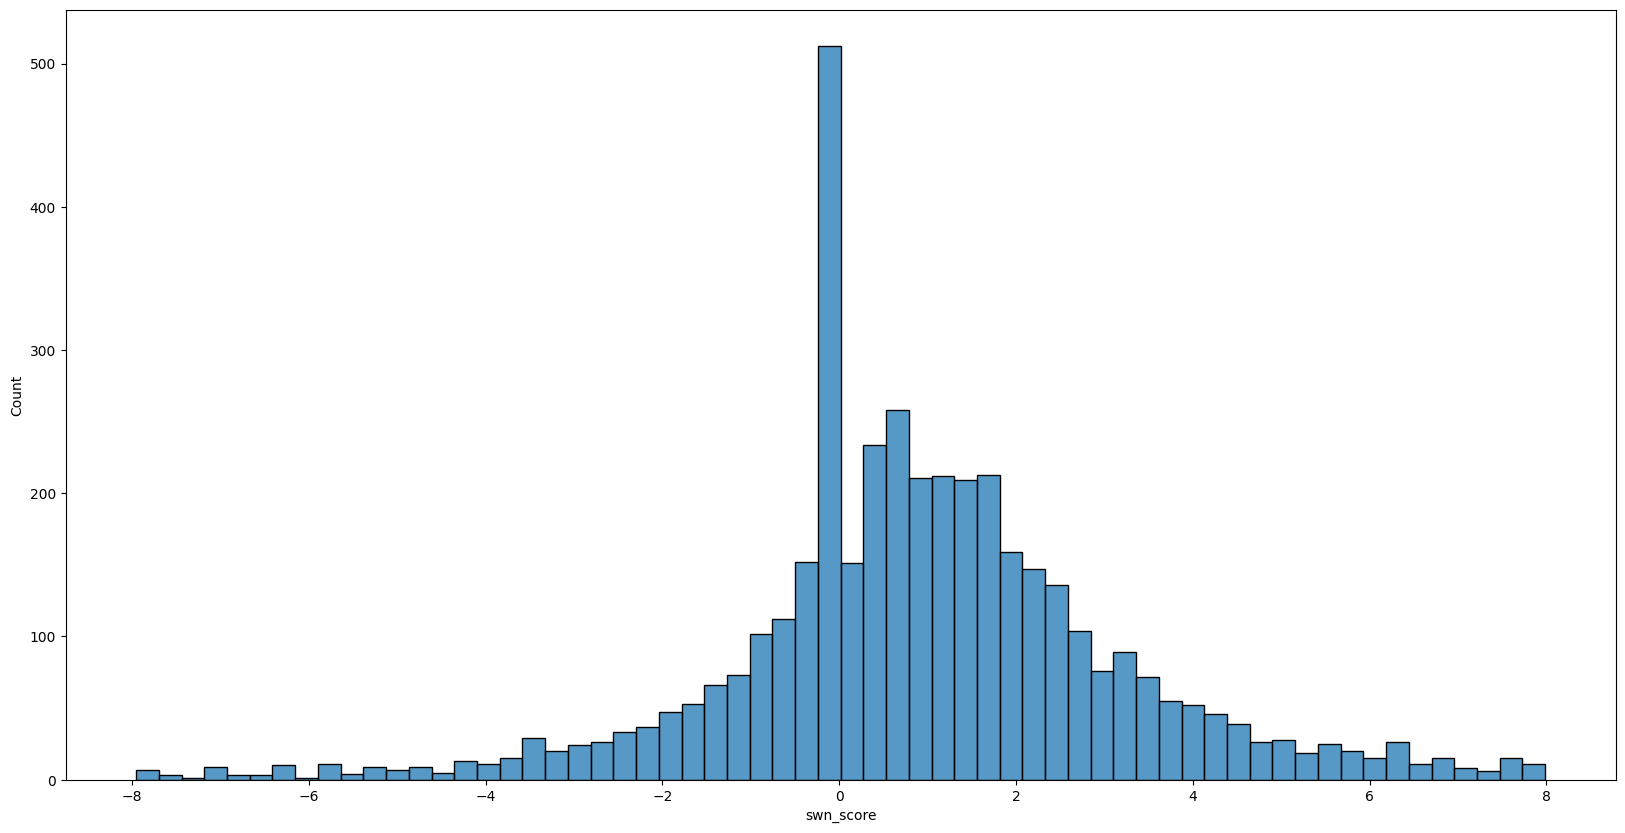

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()

In [12]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))


In [13]:
reviews['swn_sentiment'].value_counts(dropna=False)


swn_sentiment
positive    2194
negative    1840
neutral      464
Name: count, dtype: int64

<AxesSubplot: xlabel='overall', ylabel='count'>

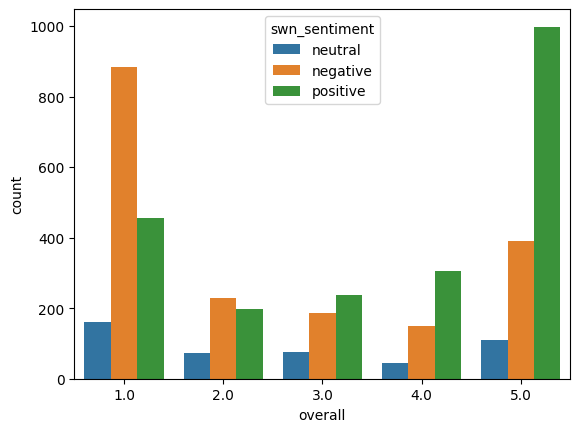

In [14]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews)


<AxesSubplot: xlabel='swn_sentiment', ylabel='overall'>

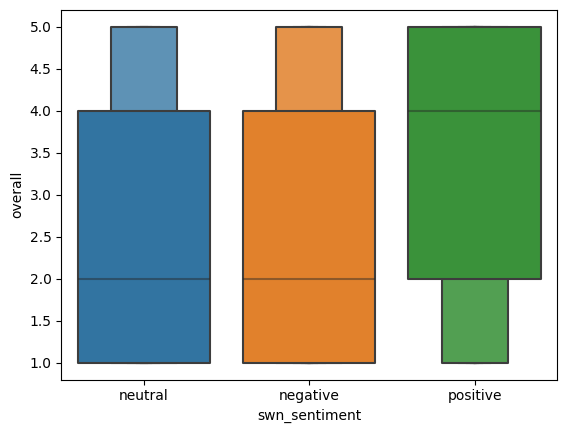

In [15]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews)


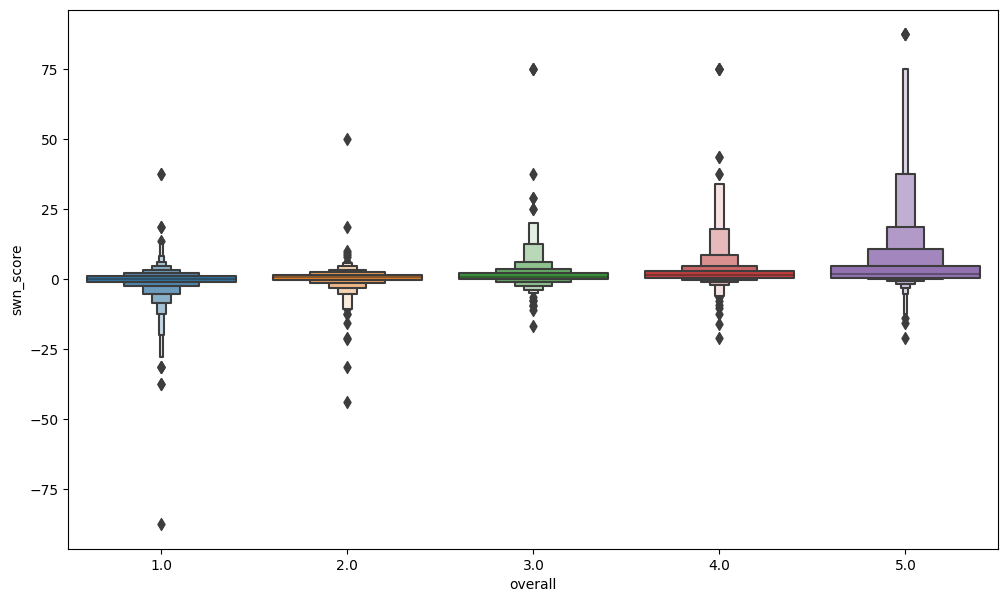

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)
plt.show()

In [17]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [18]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()


In [19]:
len(y_swn_pred), len(y_true)

(4498, 4498)

In [20]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)

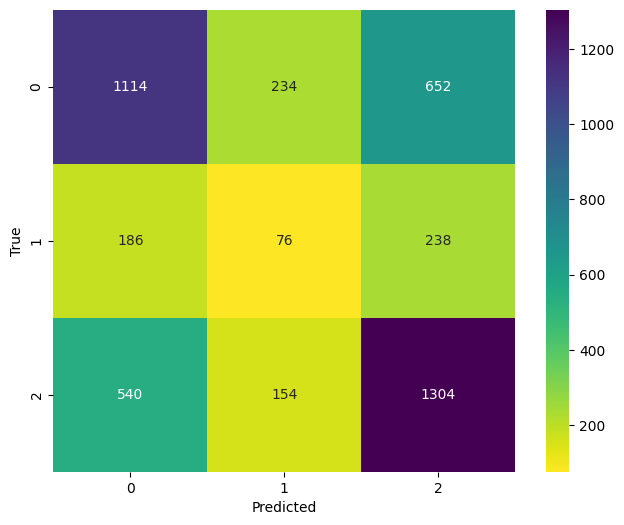

In [21]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');


# Performance Assessment

### Negative Sentiment Prediction Assessment 

In [22]:
tp, tn, fp, fn = 1114, 76+238+154+1304, 234+652, 186+540

In [23]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [24]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))


recall: 0.6054347826086957
precission: 0.557
f1 score: 0.5802083333333333


# Sentiment Scoring Model Using NLTK Opinion Lexicon

In [26]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize

In [27]:
nltk.download("opinion_lexicon")

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/tejalpatel/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [28]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [29]:
def get_sentiment_score_oplex(text):
    
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0

    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))

    
    return total_score

In [30]:
reviews['oplex_sentiment_score'] = reviews['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))


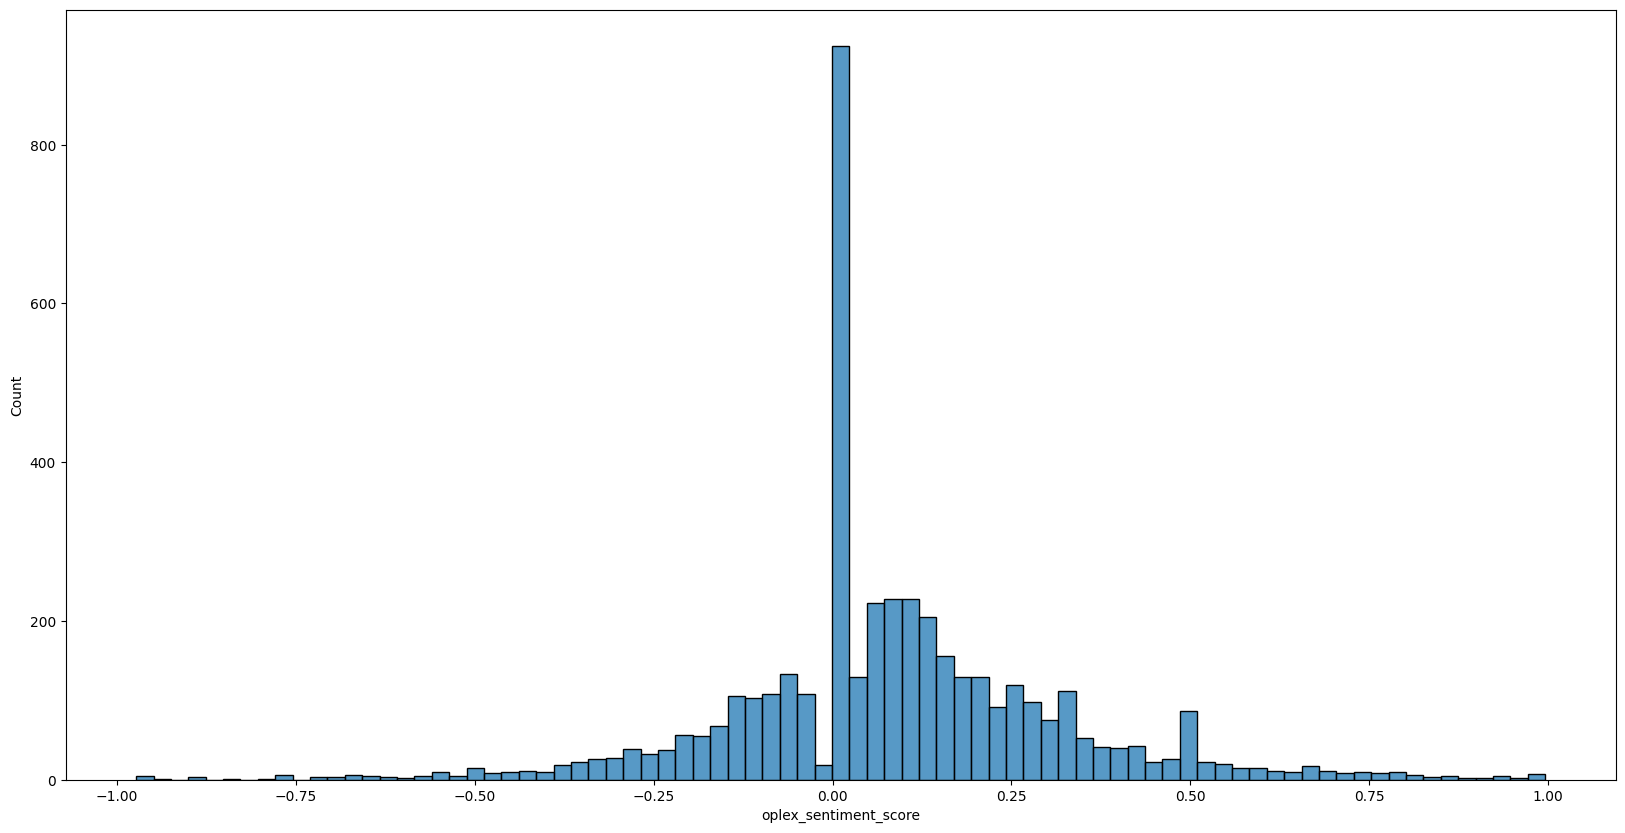

In [31]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()


In [32]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))


In [33]:
reviews['oplex_sentiment'].value_counts(dropna=False)


oplex_sentiment
positive    1865
neutral     1549
negative    1084
Name: count, dtype: int64

<AxesSubplot: xlabel='overall', ylabel='count'>

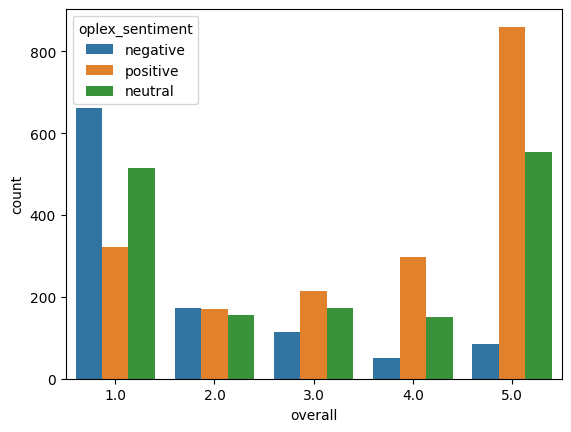

In [34]:
sns.countplot(x='overall', hue='oplex_sentiment' ,data = reviews)


<AxesSubplot: xlabel='oplex_sentiment', ylabel='overall'>

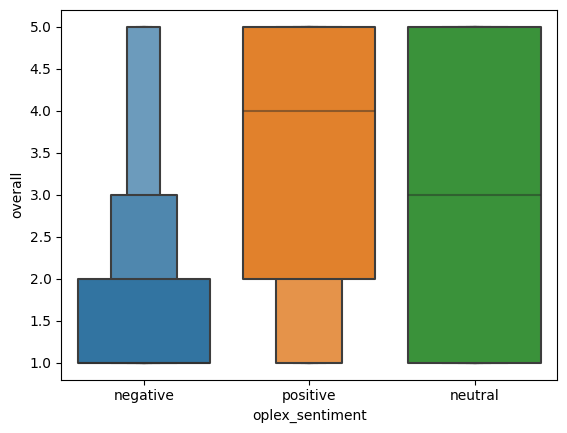

In [35]:
sns.boxenplot(x='oplex_sentiment', y='overall', data = reviews)


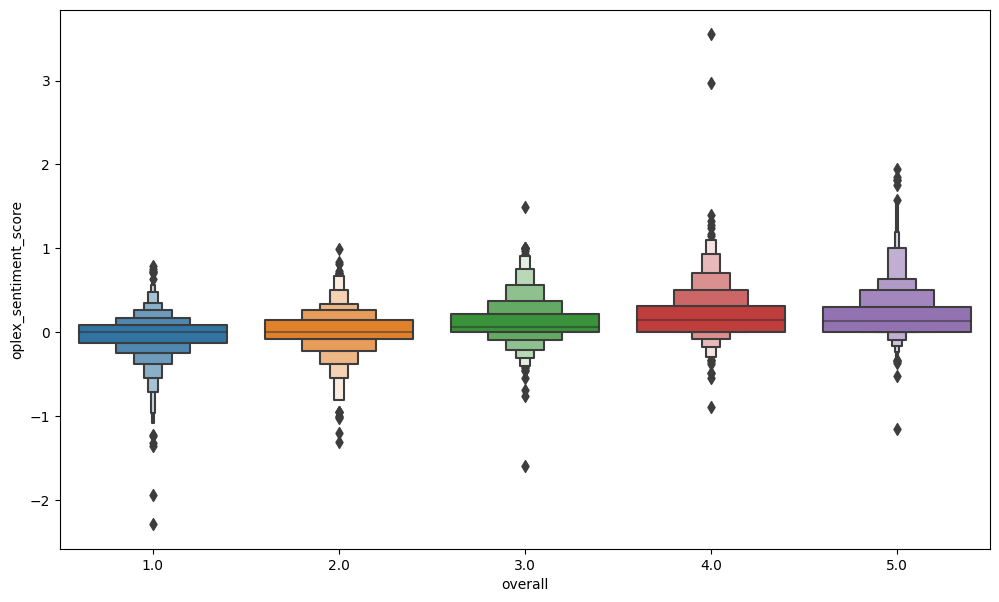

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()

In [37]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()

In [38]:
oplex_cm = confusion_matrix(y_true, y_oplex_pred)


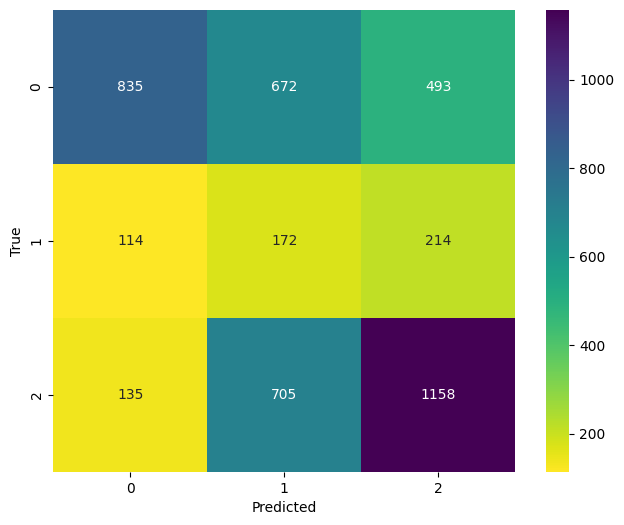

In [39]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');


In [40]:
oplex_cm = list(oplex_cm.ravel())


In [41]:
oplex_cm

[835, 672, 493, 114, 172, 214, 135, 705, 1158]

### Negative Label Assessment

In [42]:
tp, tn, fp, fn = 835, 172+214+705+1158, 114+135, 672+493

In [44]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [45]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))


recall: 0.4175
precission: 0.7702952029520295
f1 score: 0.5415045395590142


### Positive Label Assessment

In [46]:
tp, tn, fp, fn = 1158, 835+672+114+172, 493+214, 135+705

In [47]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)


In [48]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))


recall: 0.5795795795795796
precission: 0.6209115281501341
f1 score: 0.5995340409008543
